In [821]:
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import re
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Twitter archive file

## 1- Gathering data

In [822]:
twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### The Volume of twitter_archive

In [776]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## 2- Assessing data

- Assess data visually as well as programmatically using pandas for quality and tidiness issues.


In [777]:
# display sample of data
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
803,772152991789019136,NaN,NaN,2016-09-03 19:23:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a couple rufferees making sure all the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772152991...,10,10,None,None,None,None,None
419,822244816520155136,NaN,NaN,2017-01-20 00:50:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send pics of m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822244816...,11,10,None,None,None,None,None
1720,680145970311643136,NaN,NaN,2015-12-24 22:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kawhi. He was doing fine until hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680145970...,10,10,Kawhi,None,None,pupper,None
1331,705591895322394625,NaN,NaN,2016-03-04 03:13:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Ma'am, for the last time, I'm not authorized ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/705591895...,11,10,None,None,None,None,None
703,785927819176054784,NaN,NaN,2016-10-11 19:39:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's strives to be the best pot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785927819...,12,10,Lucy,None,None,None,None


In [802]:
# check if dogs have more than one category assigned
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    twitter_archive[category] = twitter_archive[category].apply(lambda x: 0 if x == 'None' else 1)

twitter_archive['number_categories'] = twitter_archive.loc[:,categories].sum(axis = 1)

## Check the vaules of rating_numerator column

In [803]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

###  Check the vaules of  rating_denominator column

In [804]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [805]:
# check if any float ratings in the text column
display(twitter_archive[['text', 'rating_numerator', 'rating_denominator']][twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            )


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1689,I've been told there's a slight possibility he...,5,10
1712,Here we have uncovered an entire battalion of ...,26,10


In [806]:
# check expanded urls
twitter_archive[['text','expanded_urls']][~twitter_archive['expanded_urls'].str.startswith(('https://twitter.com','http://twitter.com', 'https://vine.co'), na=False)].sample(3)


,text,expanded_urls
1497,PUPDATE: just noticed this dog has some extra ...,NaN
97,RT @dog_rates: This is Sierra. She's one preci...,https://www.gofundme.com/help-my-baby-sierra-g...
707,"Today, 10/10, should be National Dog Rates Day",NaN


In [807]:
# check for two or more urls in the expanded urls
twitter_archive['expanded_urls'][twitter_archive['expanded_urls']
                .str.contains(',', na = False)].count()

639

In [808]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
number_categories                0
dtype: int64


## Quality Issues in twitter_archive

- Delete columns that won't be used for analysis.
- The timestamp should be DateTime.
- some of the gathered tweets are replies and should be removed.
- some of the gathered tweets are retweets.
- Dog 'stage' classification (doggo, floofer, pupper or puppo) should be one column.
- some dogs have more than one category assigned.
- Correct denominators other than 10.
- float ratings have been incorrectly read from the text of tweet.
- we have 639 expanded urls which contain more than one url address.


## Tidiness Issues in twitter_archive
- There are 181 retweets which need to be removed. This will ensure there are not two rows corresponding to the same tweet, i.e. holding to the definition of tidy data which requires each row to represent a unique entry.

- There are 78 tweet replies which need to be removed. This will ensure there are not two rows corresponding to the same tweet, i.e. holding to the definition of tidy data which requires each row to represent a unique entry.

- Change columns "doggo", "floofer", "pupper", and "puppo" from wide to long format.

## 3- Cleaning Data

- Using pandas, clean the quality and tidiness issues identified in the Assessing Data section.

In [1252]:
twitter_archive_clean=twitter_archive.copy() 

In [1253]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1254]:
# drop retweets                                                 
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]


In [1255]:
#test 
print(sum(twitter_archive_clean['retweeted_status_user_id'].value_counts()))

0


In [1256]:
# drop columns contain alot of nan more than 50% 
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                      'retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace =True)

In [1257]:
twitter_archive_clean = twitter_archive_clean.reset_index()

In [1258]:
#test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 13 columns):
index                 2175 non-null int64
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(4), object(9)
memory usage: 221.0+ KB


### Define
  - Dog classification (doggo, floofer, pupper or puppo) should be one column.
  - Some dogs have more than one category assigned.


## code

In [1259]:
twitter_archive_clean['dog_type'] = 'NaN'

In [1260]:
# Creating a single column for dog category

for i in range(0, len(twitter_archive_clean.index)):
    if twitter_archive_clean.loc[i, 'doggo'] == 'doggo':
        twitter_archive_clean.loc[i, 'dog_type'] = 'doggo'
    elif twitter_archive_clean.loc[i, 'floofer'] == 'floofer':
        twitter_archive_clean.loc[i, 'dog_type'] = 'floofer'
    elif twitter_archive_clean.loc[i, 'pupper'] == 'pupper':
        twitter_archive_clean.loc[i, 'dog_type'] = 'pupper'
    elif twitter_archive_clean.loc[i, 'puppo'] == 'puppo':
        twitter_archive_clean.loc[i, 'dog_type'] = 'puppo'
    else:
        twitter_archive_clean.loc[i, 'dog_type'] = 'None'

In [1261]:
twitter_archive_clean['dog_type'].value_counts()

None       1831
pupper      224
doggo        87
puppo        24
floofer       9
Name: dog_type, dtype: int64

In [1262]:
# Checking for entries labelled with multiple categories

multi_cat_list = []

for i in range(0, len(twitter_archive_clean.index)):
    if twitter_archive_clean.doggo[i] == 'doggo' and (twitter_archive_clean.floofer[i] == 'floofer' \
                                                   or twitter_archive_clean.pupper[i] == 'pupper'\
                                                   or twitter_archive_clean.puppo[i] == 'puppo'):
        multi_cat_list.append(i)


In [1263]:
twitter_archive_clean[['floofer','doggo']][twitter_archive_clean['doggo']=='doggo'][twitter_archive_clean['floofer']=='floofer']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,floofer,doggo
172,floofer,doggo


In [1264]:
twitter_archive_clean.loc[172, 'dog_type'] = 'multiple'

In [1265]:
twitter_archive_clean.loc[382, 'dog_type'] = 'multiple'


In [1266]:
twitter_archive_clean.loc[442, 'dog_type'] = 'multiple'


In [1267]:
twitter_archive_clean.loc[467, 'dog_type'] = 'multiple'


In [1268]:
twitter_archive_clean.loc[474, 'dog_type'] = 'multiple'


In [1269]:
twitter_archive_clean.loc[567, 'dog_type'] = 'multiple'


In [1270]:

twitter_archive_clean.loc[593, 'dog_type'] = 'multiple'


In [1271]:
twitter_archive_clean.loc[722, 'dog_type'] = 'multiple'


In [1272]:
twitter_archive_clean.loc[781, 'dog_type'] = 'multiple'


In [1273]:
twitter_archive_clean.loc[885, 'dog_type'] = 'multiple'


In [1274]:
twitter_archive_clean.loc[935, 'dog_type'] = 'multiple'


In [1275]:
twitter_archive_clean.loc[165, 'dog_type'] = 'multiple'

In [1276]:
twitter_archive_clean['dog_type'].value_counts()

None        1831
pupper       224
doggo         75
puppo         24
multiple      12
floofer        9
Name: dog_type, dtype: int64

In [1277]:
drop_cats = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean.drop(drop_cats, axis=1, inplace=True)
twitter_archive_clean.head()

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [1278]:
twitter_archive_clean.set_index('tweet_id',inplace=True)

## Test

In [1279]:
twitter_archive_clean.sample(3)

,index,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
tweet_id,,,,,,,,,
667924896115245057,2240,2015-11-21 04:37:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He has always wanted to be a c...,https://twitter.com/dog_rates/status/667924896...,9,10,Jiminy,None
732726085725589504,1115,2016-05-18 00:14:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aldrick. He looks wise af. Also except...,https://twitter.com/dog_rates/status/732726085...,11,10,Aldrick,None
670403879788544000,2122,2015-11-28 00:48:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nigel. He accidentally popped his ball...,https://twitter.com/dog_rates/status/670403879...,10,10,Nigel,None


# Define

- The timestamp has an incorrect datatype is an object

   -  you must convert to datetime.


## code

In [1280]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

###  test

In [1281]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 9 columns):
index                 2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_type              2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 169.9+ KB




## Define

- Float ratings have been incorrectly read from the text of tweet

    gather correct rating when rating is a fraction.


### Code

In [1282]:
twitter_archive_clean[['text','rating_denominator', 'rating_numerator']][twitter_archive_clean.text.str.
                                                                         contains(r'\d+\.\d+\/\d+')].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
786709082849828864,"This is Logan, the Chow who lived. He solemnly...",10,75
680494726643068929,Here we have uncovered an entire battalion of ...,10,26
681340665377193984,I've been told there's a slight possibility he...,10,5


In [1283]:
# convert datatype of these columns
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

In [1284]:
# find columns with fractions
fraction_ratings = twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+', na = False)].index

# extract correct rating and replace incorrect one
for index in fraction_ratings:
    rating = re.search('\d+\.\d+\/\d+', twitter_archive_clean.loc[index,:]
                       .text).group(0)
    twitter_archive_clean.at[index,'rating_numerator'], twitter_archive_clean.at[index,'rating_denominator'] = rating.split('/')

# test

In [1285]:

twitter_archive_clean.loc[fraction_ratings,:][['text','rating_denominator', 'rating_numerator']].sample(3)


,text,rating_denominator,rating_numerator
tweet_id,,,
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,10.0,11.27
680494726643068929,Here we have uncovered an entire battalion of ...,10.0,11.26
681340665377193984,I've been told there's a slight possibility he...,10.0,9.50


# Define

- Denominator of some ratings is not 10. Numerator of some ratings is greater than 10. The fact that the rating numerators are greater than the denominators does not need to be cleaned, however I will introduce a normalized rating which will be easier to plot.

    fix incorrectly read ratings
    add normalized rating


In [1286]:
# detect high denominator
high_denominator = twitter_archive[twitter_archive['rating_denominator'] > 10].index

# display sample of data with denominator greater than 10
twitter_archive_clean.loc[high_denominator,:][['text','rating_denominator', 'rating_numerator']]

KeyError: "None of [Int64Index([ 342,  433,  784,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274,\n            1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843],\n           dtype='int64')] are in the [index]"

## code

### fix data with denominator greater than 10

In [1095]:
twitter_archive_clean.loc[832088576586297345, 'rating_denominator'] = 0
twitter_archive_clean.loc[832088576586297345, 'rating_numerator'] = 0

twitter_archive_clean.loc[775096608509886464, 'rating_denominator'] = 10
twitter_archive_clean.loc[775096608509886464, 'rating_numerator'] = 14

twitter_archive_clean.loc[740373189193256964, 'rating_denominator'] = 10
twitter_archive_clean.loc[740373189193256964, 'rating_numerator'] = 14

twitter_archive_clean.loc[722974582966214656, 'rating_denominator'] = 10
twitter_archive_clean.loc[722974582966214656, 'rating_numerator'] = 13

twitter_archive_clean.loc[716439118184652801, 'rating_denominator'] = 10
twitter_archive_clean.loc[716439118184652801, 'rating_numerator'] = 11

twitter_archive_clean.loc[682962037429899265, 'rating_denominator'] = 10
twitter_archive_clean.loc[682962037429899265, 'rating_numerator'] = 10

In [1096]:
# test 
twitter_archive_clean.loc[high_denominator,:][['text','rating_denominator', 'rating_numerator']].sample(3)

KeyError: "None of [Int64Index([ 342,  433,  784,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274,\n            1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843],\n           dtype='int64')] are in the [index]"

# Define

- 639 expanded urls which contain more than one url address and 59 missing expanded urls

    build correct links by using tweet id


## code

In [1097]:
# fix expanded urls
for index, column in twitter_archive_clean.iterrows():
    twitter_archive_clean.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)
    


### Test

In [1098]:

twitter_archive_clean.sample(3)

,index,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,dog_category
tweet_id,,,,,,,,,,
810254108431155201,520.0,2016-12-17 22:43:27,"<a href=""http://twitter.com/download/iphone"" r...","This is Gus. He likes to be close to you, whic...",https://twitter.com/dog_rates/status/810254108...,12.0,10.0,Gus,None,NaN
751793661361422336,954.0,2016-07-09 15:02:31,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Fred. He's having one heck of a summer...,https://twitter.com/dog_rates/status/751793661...,11.0,10.0,Fred,None,NaN
673689733134946305,1949.0,2015-12-07 02:25:23,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a blast and remember tomorr...,https://twitter.com/dog_rates/status/673689733...,11.0,10.0,None,None,NaN


In [1099]:
# add column called rating that equal = rating_num/rating_deno
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

# 2. Tweet image prediction

## 1- Gathering data

In [1100]:
# read image predictions
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
# use tweet id column as index
image_prediction.set_index("tweet_id", inplace = True)
# display five lines from image prediction
image_prediction.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 2- Assessing data

In [1101]:
# The summary of a DataFrame
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [1102]:
# check jpg_url to confirm if it contains only jpg and png images
print(image_prediction['jpg_url'][~image_prediction['jpg_url'].str.endswith(('.jpg', '.png'), na = False)]
      .count())
# check dupicated values in jpg_url column
sum(image_prediction.jpg_url.duplicated())

0


66

In [1103]:
# check values_ counts in img_num column
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

image_prediction.isnull().sum()

## Quality  Issues in Image Predictions
- the dataset has 2075 entries, while twitter archive dataset has 2356 entries.
- 66 jpg_url duplicates were found.
- column names are confusing and do not give much information about the content.
- dog breeds contain underscores, and have different case formatting.
- only 2075 images have been classified as dog images for top prediction.
- dataset should be merged with the twitter archive dataset.



## Tidiness Issues in Image Predictions
- there is no Tidiness Issues 

## 3- Cleaning image prediction data

In [1104]:
image_prediction_clean = image_prediction.copy()
image_prediction_clean.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define

-    Columns names are confusing and do not give much information about the content you must change the names of it


### code 

In [1105]:
image_prediction_clean.columns = ['image_url',
                                  'img_number', 
                                  '1st_prediction',
                                  '1st_prediction_confidence',
                                  '1st_prediction_isdog',
                                  '2nd_prediction',
                                  '2nd_prediction_confidence',
                                  '2nd_prediction_isdog',
                                  '3rd_prediction',
                                  '3rd_prediction_confidence',
                                  '3rd_prediction_isdog']

### test

In [1106]:
print(image_prediction_clean.columns)
image_prediction_clean.head()

Index(['image_url', 'img_number', '1st_prediction',
       '1st_prediction_confidence', '1st_prediction_isdog', '2nd_prediction',
       '2nd_prediction_confidence', '2nd_prediction_isdog', '3rd_prediction',
       '3rd_prediction_confidence', '3rd_prediction_isdog'],
      dtype='object')


,image_url,img_number,1st_prediction,1st_prediction_confidence,1st_prediction_isdog,2nd_prediction,2nd_prediction_confidence,2nd_prediction_isdog,3rd_prediction,3rd_prediction_confidence,3rd_prediction_isdog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
- Drop duplicated values in image_url 66 values  

### Code

In [1107]:
image_prediction_clean['image_url'].drop_duplicates(inplace= True)

### Test

In [1108]:
image_prediction_clean['image_url'].duplicated().sum()

0

### Define
- romve underscore from these columns 1st_prediction,2nd_prediction,3rd_prediction


### code

In [1109]:
columns= ['1st_prediction' , '2nd_prediction' , '3rd_prediction']
for i in columns:
    image_prediction_clean[i]= image_prediction_clean[i].str.replace('_',' ')

### Test

In [1110]:
image_prediction_clean.head()

,image_url,img_number,1st_prediction,1st_prediction_confidence,1st_prediction_isdog,2nd_prediction,2nd_prediction_confidence,2nd_prediction_isdog,3rd_prediction,3rd_prediction_confidence,3rd_prediction_isdog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1111]:
image_prediction_clean['1st_prediction_isdog'].value_counts()

True     1532
False     543
Name: 1st_prediction_isdog, dtype: int64

### Define

- Only 2075 images have been classified as dog images for top prediction

    If 1st predictions is not a dog breed, then use dog breed predicted in the 2nd or 3rd predicion.

### code

In [1112]:
# build function to determine dog breed
# if no breed detected, set value to NaN

def get_breed(row):
    if row['1st_prediction_isdog'] == True:
        return row['1st_prediction'], row['1st_prediction_confidence']
    if row['2nd_prediction_isdog'] == True:
        return row['2nd_prediction'], row['2nd_prediction_confidence']
    if row['3rd_prediction_isdog'] == True:
        return row['3rd_prediction'], row['3rd_prediction_confidence']
    return np.nan, np.nan

# apply function to dataset
# create new columns with data
image_prediction_clean[['breed_predicted', 'prediction_confidence']] = pd.DataFrame(image_prediction_clean.apply(lambda row: get_breed(row), axis = 1)
                                                                                    .tolist(), index = image_prediction_clean.index) 

In [1113]:
columns= ['1st_prediction','1st_prediction_confidence','1st_prediction_isdog','2nd_prediction','2nd_prediction_confidence','2nd_prediction_isdog','3rd_prediction','3rd_prediction_confidence','3rd_prediction_isdog']
image_prediction_clean.drop(columns , inplace =True, axis=1)
image_prediction_clean.head()

,image_url,img_number,breed_predicted,prediction_confidence
tweet_id,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311


### Test

In [1114]:
image_prediction_clean.head()

,image_url,img_number,breed_predicted,prediction_confidence
tweet_id,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311


# 1- Gathering  Twitter Api data

In [1115]:
with open('tweet-json.txt') as f:
    twitter_api = pd.DataFrame((json.loads(line) for line in f),
                               columns = ['id', 'favorite_count', 'retweet_count'])

# change column names
twitter_api.columns = ['tweet_id', 'favorites', 'retweets']
# use tweet id column as index
twitter_api.set_index('tweet_id', inplace = True)
# display few lines
twitter_api.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


### 2- Assess Twitter API Data

In [1116]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(2)
memory usage: 55.2 KB


### check index of data is unique

In [1117]:
twitter_api.index.is_unique

True


### Quality Issues in Twitter API Data

  -  twitter archive dataset has 2356 entries, while twitter API data has 2354.

  - dataset should be merged with the twitter archive dataset.



## Tidiness Issues in Twitter API Data
- there is no Tidiness Issues in Twitter API Data

### 3- Clean Twitter API Data¶

In [1118]:
twitter_api.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


#### The dataset is clean so there is no need to perform cleaning tasks

# merge all cleand data

In [1119]:
from functools import reduce
df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'),
            [twitter_archive_clean, image_prediction_clean, twitter_api])

In [1120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 892420643555336193 to 666020888022790149
Data columns (total 17 columns):
index                    1994 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
dog_type                 1994 non-null object
dog_category             3 non-null object
rating                   1994 non-null float64
image_url                1994 non-null object
img_number               1994 non-null int64
breed_predicted          1686 non-null object
prediction_confidence    1686 non-null float64
favorites                1994 non-null int64
retweets                 1994 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(8)
memory usage: 

In [1121]:
df.describe()

,index,rating_numerator,rating_denominator,rating,img_number,prediction_confidence,favorites,retweets
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1686.000000,1994.000000,1994.000000
mean,1249.509529,12.226068,10.506018,1.165951,1.203109,0.549936,8895.725677,2766.753260
std,679.603558,41.461990,7.264014,4.064224,0.560777,0.299270,12213.193181,4674.698447
min,0.000000,0.000000,2.000000,0.000000,1.000000,0.000010,81.000000,16.000000
25%,688.250000,10.000000,10.000000,1.000000,1.000000,0.302892,1982.000000,624.750000
50%,1284.500000,11.000000,10.000000,1.100000,1.000000,0.550604,4136.000000,1359.500000
75%,1844.500000,12.000000,10.000000,1.200000,1.000000,0.821962,11308.000000,3220.000000
max,2355.000000,1776.000000,170.000000,177.600000,4.000000,0.999956,132810.000000,79515.000000


### Save merged data

In [1122]:
df.to_csv('twitter-archive-master.csv',index= False)

# Analyzing and Visualizing Data

In [1123]:
df.head()

,index,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,dog_category,rating,image_url,img_number,breed_predicted,prediction_confidence,favorites,retweets
tweet_id,,,,,,,,,,,,,,,,,
892420643555336193,0.0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN,39467,8853
892177421306343426,1.0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,33819,6514
891815181378084864,2.0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,25461,4328
891689557279858688,3.0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador retriever,0.168086,42908,8964
891327558926688256,4.0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,41048,9774


## Insight one
- check Most common dog Breed

In [1124]:
df['breed_predicted'].value_counts()

golden retriever                  158
Labrador retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy poodle                         51
chow                               48
Samoyed                            42
Pomeranian                         42
malamute                           33
Chesapeake Bay retriever           31
French bulldog                     31
cocker spaniel                     30
miniature pinscher                 25
Eskimo dog                         22
Cardigan                           21
German shepherd                    21
Staffordshire bullterrier          21
beagle                             20
Siberian husky                     20
Shih-Tzu                           20
Shetland sheepdog                  19
Maltese dog                        19
Rottweiler                         19
kuvasz                             18
Lakeland terrier                   18
Italian grey

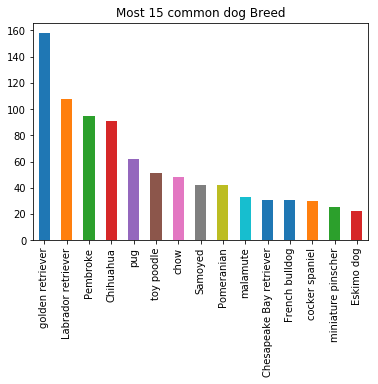

In [1125]:
df['breed_predicted'].value_counts()[:15].plot(kind='bar')
plt.title('Most 15 common dog Breed')
plt.show()

#### Golden Retriever, Labrador Retriever, Pembroke, and Chihuahua are the most popular dog breeds!

# Insight Two
- Average rating among dog Breeds

In [1126]:
df_dog_type_mean = df.groupby('breed_predicted').mean()
df_dog_type_mean.head()

,index,rating_numerator,rating_denominator,rating,img_number,prediction_confidence,favorites,retweets
breed_predicted,,,,,,,,
Afghan hound,557.333333,9.666667,10.0,0.966667,1.000000,0.433959,17326.666667,5976.0000
Airedale,1440.166667,9.833333,10.0,0.983333,1.166667,0.583771,5280.833333,1393.7500
American Staffordshire terrier,1002.562500,10.312500,10.0,1.031250,1.187500,0.527359,9380.187500,2310.8125
Appenzeller,722.500000,11.000000,10.0,1.100000,1.000000,0.503665,7317.500000,1458.0000
Australian terrier,808.000000,11.500000,10.0,1.150000,2.000000,0.307584,11127.500000,3078.5000


In [1127]:
df_dog_type_mean['rating'].sort_values()

breed_predicted
Japanese spaniel               0.500000
soft-coated wheaten terrier    0.880000
Scotch terrier                 0.900000
Walker hound                   0.900000
Tibetan terrier                0.925000
dalmatian                      0.933333
Boston bull                    0.941667
Welsh springer spaniel         0.950000
Maltese dog                    0.952632
Dandie Dinmont                 0.957143
miniature schnauzer            0.960000
Norwich terrier                0.960000
Afghan hound                   0.966667
redbone                        0.966667
Scottish deerhound             0.975000
Rhodesian ridgeback            0.975000
Airedale                       0.983333
Newfoundland                   0.985714
Mexican hairless               0.985714
Saint Bernard                  0.985714
English setter                 0.987500
miniature poodle               0.987500
miniature pinscher             1.000000
groenendael                    1.000000
Italian greyhound       

# Insight three
- Dog Types

In [1128]:
# the count od types of dog
df.dog_type.value_counts()

None        1688
pupper       203
doggo         66
puppo         22
multiple       8
floofer        7
Name: dog_type, dtype: int64

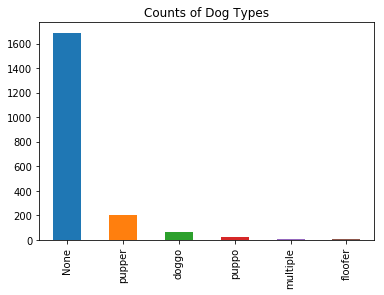

In [1287]:
df.dog_type.value_counts().plot(kind= 'bar')
plt.title('Counts of Dog Types')
plt.show()

### Pupper is the most common dog category ,Doggo,puppo,finaly floofer

# Insight Four

- Account Popularity over Time

  Account Popularity based on the numbers of Favorites and Retweets over time.


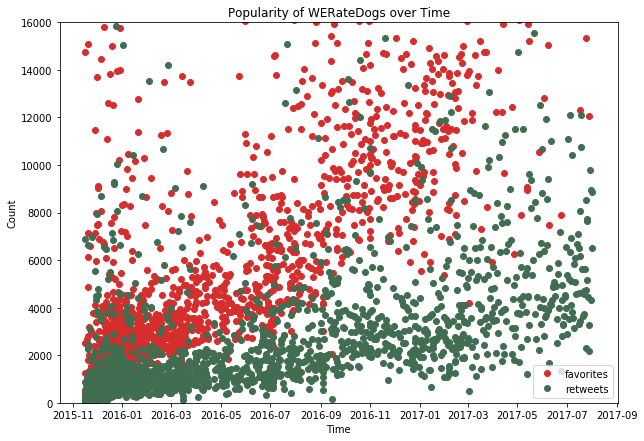

In [1130]:
d = pd.DataFrame(df['timestamp'])
fig, ax = plt.subplots(figsize=(10,7))
ax.plot_date(d,df['favorites'], color="#d62d2d")
ax.plot_date(d,df['retweets'], color="#416d51")
ax.set_ylim([0,16000])
ax.set_title('Popularity of WERateDogs over Time')

# Setting x and y labels.
ax.set_ylabel('Count')
ax.set_xlabel('Time')
ax.legend()